## Table of Contents:
* [Hyperparameter optimization](#hyperparameter-optimization)
* [Plot: Cumulative reward of current episode over episode](#cum-reward-episode)
    * [Decaying Epsilon Greedy](#1-decay-epsilon)
    * [Epsilon Greedy](#1-epsilon)
    * [UCB1](#1-ucb)
* [Plot: Cumulative reward of current episode over episode](#cum-reward-steps)
    * [Decaying Epsilon Greedy](#2-decay-epsilon)
    * [UCB1](#2-ucb)
    * [Epsilon Greedy](#2-epsilon)


In [1]:
from gridworld import *
from plot import *
import optimize_steps
import optimize_episodes
from sarsa import *
from qlearning import *
from misc import *
COUNT_ENVIRONMENT = 10

## Hyperparameter optimization <a class="anchor" id="hyperparameter-optimization"></a>

In [42]:
#Create Environments
a1_env = Random(size=12, water=0.3, mountain=0)
a2_env = Random(size = 12, water=0, mountain=0.3)

for row in a1_env.grid:
    print(row)

[' ', ' ', 'O', ' ', ' ', ' ', 'O', ' ', 'O', ' ', ' ', 'O']
[' ', 'O', ' ', ' ', 'O', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ']
['O', ' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', 'O', 'O', ' ']
['O', ' ', 'S', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', 'O', ' ', 'O', ' ']
['O', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', 'O', 'O', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', 'O', ' ']
[' ', 'G', ' ', 'O', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', 'O', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'O']


In [ ]:
#run parameter optimization 
study2 = optimize_episodes.optimize_episodes(a2_env)
study2.study_qlearning_decay_epsilon("qlearning_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_qlearning_epsilon_greedy("qlearning_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")

study2.study_sarsa_decay_epsilon("sarsa_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_sarsa_epsilon_greedy("sarsa_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_sarsa_ucb("sarsa_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_qlearning_ucb("qlearning_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")


study = optimize_steps.optimize_steps(a1_env)
study.study_qlearning_decay_epsilon("qlearning_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_sarsa_epsilon_greedy("sarsa_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")

study.study_qlearning_epsilon_greedy("qlearning_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_qlearning_ucb("qlearning_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

study.study_sarsa_decay_epsilon("sarsa_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_sarsa_ucb("sarsa_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

## Plot 1: Cumulative reward of the current episode over episodes <a class="anchor" id="cum-reward-episode"></a>

In [45]:
#Load Hyperparameters
Q_PARAMS_A1_decay_epsilon = load_best_paramerters('qlearning_a1_decay_epsilon','sqlite:///hyperparameters_A1.db')
Q_PARAMS_A1_epsilon = load_best_paramerters('qlearning_a1_epsilon','sqlite:///hyperparameters_A1.db')
Q_PARAMS_A1_ucb = load_best_paramerters('qlearning_a1_ucb','sqlite:///hyperparameters_A1.db')

SARSA_PARAMS_A1_decay_epsilon = load_best_paramerters('sarsa_a1_decay_epsilon','sqlite:///hyperparameters_A1.db')
SARSA_PARAMS_A1_epsilon = load_best_paramerters('sarsa_a1_epsilon','sqlite:///hyperparameters_A1.db')
SARSA_PARAMS_A1_UCB = load_best_paramerters('sarsa_a1_ucb','sqlite:///hyperparameters_A1.db')

In [48]:
qlearning_data={}
sarsa_data={}
qlearning_data_no_decay={}
sarsa_data_no_decay={}
qlearning_data_ucb={}
sarsa_data_ucb={}
envs_A1 = []


q = qlearning(Q_PARAMS_A1_decay_epsilon['ALPHA'],
                  Q_PARAMS_A1_decay_epsilon['GAMMA'],
                  Q_PARAMS_A1_decay_epsilon['EPISODES'],
                  Q_PARAMS_A1_decay_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1_decay_epsilon['INIT_VALUE'],
                  Q_PARAMS_A1_decay_epsilon['EPS'],
                  Q_PARAMS_A1_decay_epsilon['DECAY'])


q_no_decay = qlearning(Q_PARAMS_A1_epsilon['ALPHA'],
                  Q_PARAMS_A1_epsilon['GAMMA'],
                  Q_PARAMS_A1_epsilon['EPISODES'],
                  Q_PARAMS_A1_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1_epsilon['INIT_VALUE'],
                  Q_PARAMS_A1_epsilon['EPS'])

q_ucb = qlearning(Q_PARAMS_A1_ucb['ALPHA'],
          Q_PARAMS_A1_ucb['GAMMA'],
          Q_PARAMS_A1_ucb['EPISODES'],
          Q_PARAMS_A1_ucb['MAX_EPISODE_LENGTH'],
          Q_PARAMS_A1_ucb['INIT_VALUE'],
          Q_PARAMS_A1_ucb['EPS']
          )

s = sarsa(SARSA_PARAMS_A1_decay_epsilon['ALPHA'],
          SARSA_PARAMS_A1_decay_epsilon['GAMMA'],
          SARSA_PARAMS_A1_decay_epsilon['EPISODES'],
          SARSA_PARAMS_A1_decay_epsilon['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1_decay_epsilon['INIT_VALUE'],
          SARSA_PARAMS_A1_decay_epsilon['EPS'],
          SARSA_PARAMS_A1_decay_epsilon['DECAY'])

s_no_decay = sarsa(Q_PARAMS_A1_epsilon['ALPHA'],
          Q_PARAMS_A1_epsilon['GAMMA'],
          Q_PARAMS_A1_epsilon['EPISODES'],
          Q_PARAMS_A1_epsilon['MAX_EPISODE_LENGTH'],
          Q_PARAMS_A1_epsilon['INIT_VALUE'],
          Q_PARAMS_A1_epsilon['EPS'])

s_ucb = sarsa(SARSA_PARAMS_A1_UCB['ALPHA'],
          SARSA_PARAMS_A1_UCB['GAMMA'],
          SARSA_PARAMS_A1_UCB['EPISODES'],
          SARSA_PARAMS_A1_UCB['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1_UCB['INIT_VALUE'],
          SARSA_PARAMS_A1_UCB['EPS']
          )


for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0.3, mountain=0)
    envs_A1.append(env)     
    print(f"running environment: {i}")
    
    qlearning_data[i] = q.run_decay_epsilon_greedy(env)
    sarsa_data[i] = s.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay[i] = q_no_decay.run_epsilon_greedy(env)
    sarsa_data_no_decay[i] = s_no_decay.run_epsilon_greedy(env)
    
    qlearning_data_ucb[i] = q_ucb.run_ucb(env)
    sarsa_data_ucb[i] = s_ucb.run_ucb(env)


running environment: 0
running environment: 1
running environment: 2
running environment: 3
running environment: 4
running environment: 5
running environment: 6
running environment: 7
running environment: 8
running environment: 9


### Decaying Epsilon Greedy <a class="anchor" id="1-decay-epsilon"></a>

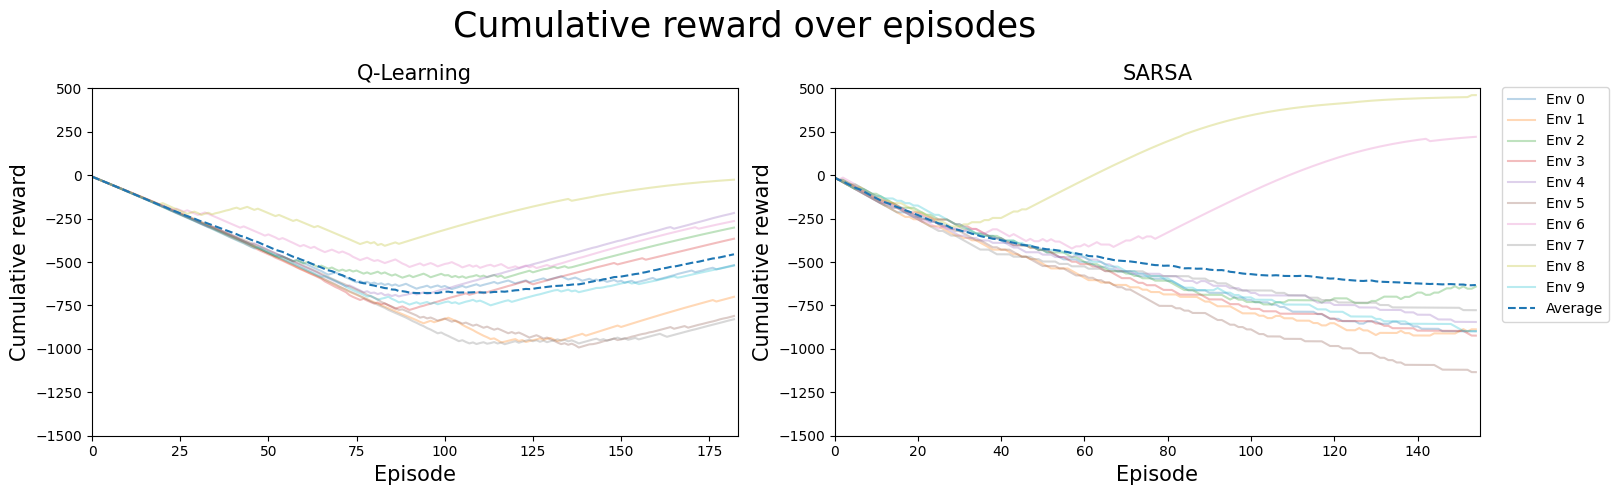

In [49]:
plot_episodes([qlearning_data, sarsa_data], [Q_PARAMS_A1_decay_epsilon['EPISODES'], SARSA_PARAMS_A1_decay_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-1500,500])

In [50]:
print_stats(eval(qlearning_data), "Q-Learning with decaying Epsilon Greedy")
print()
print_stats(eval(sarsa_data), "SARSA decaying with decaying Epsilon Greedy")

Q-Learning with decaying Epsilon Greedy
Found the target for the first on average in Episode 59.1
Found the target on average 83.9 times
Average Episode length: 57.41256830601094

SARSA decaying with decaying Epsilon Greedy
Found the target for the first on average in Episode 48.8
Found the target on average 24.3 times
Average Episode length: 25.20451612903226


In [51]:
print_parameters(Q_PARAMS_A1_decay_epsilon, SARSA_PARAMS_A1_decay_epsilon)

+--------------------+-------------------------+--------------------+
|                    |   Q-Learning Parameters |   SARSA Parameters |
|--------------------+-------------------------+--------------------|
| EPISODES           |              183        |         155        |
| INIT_VALUE         |                3        |           2        |
| MAX_EPISODE_LENGTH |              943        |          34        |
| GAMMA              |                0.917767 |           0.980053 |
| ALPHA              |                0.079117 |           0.130269 |
| EPS                |                0.144976 |           0.391048 |
| DECAY              |                0.127049 |           0.837658 |
+--------------------+-------------------------+--------------------+


### Epsilon Greedy <a class="anchor" id="1-epsilon"></a>

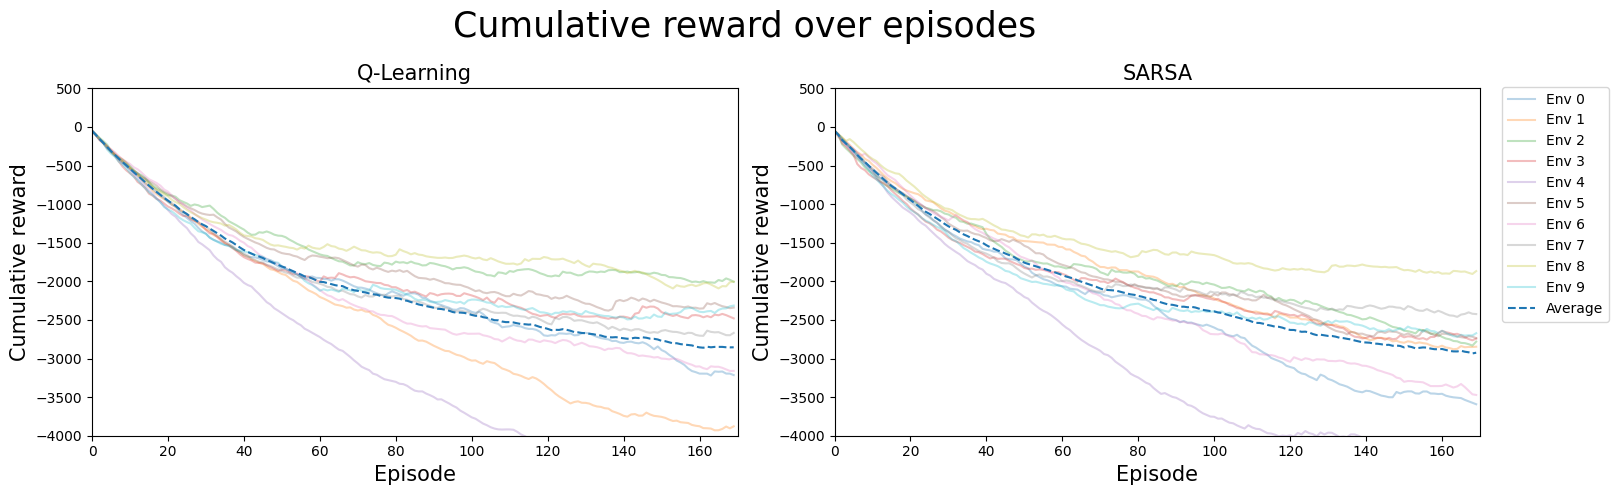

In [52]:
plot_episodes([qlearning_data_no_decay, sarsa_data_no_decay], [Q_PARAMS_A1_epsilon['EPISODES'], SARSA_PARAMS_A1_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-4000,500])

In [53]:
print_stats(eval(qlearning_data_no_decay), "Q-Learning with Epsilon Greedy")
print()
print_stats(eval(sarsa_data_no_decay), "SARSA decaying with Epsilon Greedy")

Q-Learning with Epsilon Greedy
Found the target for the first on average in Episode 14.9
Found the target on average 0.1 times
Average Episode length: 1655.9029411764707

SARSA decaying with Epsilon Greedy
Found the target for the first on average in Episode 1.2
Found the target on average 0.4 times
Average Episode length: 1658.4


In [54]:
print_parameters(Q_PARAMS_A1_epsilon, SARSA_PARAMS_A1_epsilon)

+--------------------+-------------------------+--------------------+
|                    |   Q-Learning Parameters |   SARSA Parameters |
|--------------------+-------------------------+--------------------|
| EPISODES           |              170        |         170        |
| INIT_VALUE         |                5        |           5        |
| MAX_EPISODE_LENGTH |            44545        |       44545        |
| GAMMA              |                0.607389 |           0.607389 |
| ALPHA              |                0.433208 |           0.433208 |
| EPS                |                0.158498 |           0.158498 |
+--------------------+-------------------------+--------------------+


### UCB <a class="anchor" id="1-ucb"></a>

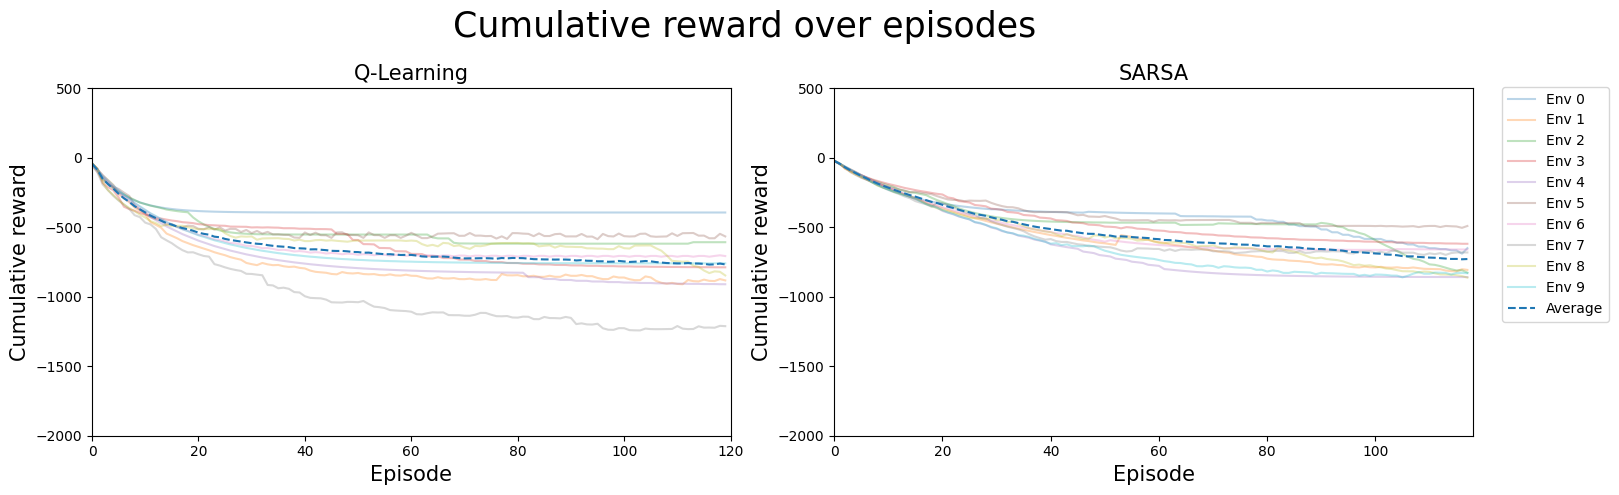

In [58]:
plot_episodes([qlearning_data_ucb, sarsa_data_ucb], [Q_PARAMS_A1_ucb['EPISODES'], SARSA_PARAMS_A1_UCB['EPISODES']], ['Q-Learning', 'SARSA'], [-2000,500])

In [59]:
print_stats(eval(qlearning_data_ucb), "Q-Learning with UCB1")
print()
print_stats(eval(sarsa_data_ucb), "SARSA decaying with UCB1")

Q-Learning with UCB1
Found the target for the first on average in Episode 0.0
Found the target on average 0.0 times
Average Episode length: 4129.365833333332

SARSA decaying with UCB1
Found the target for the first on average in Episode 0.0
Found the target on average 0.0 times
Average Episode length: 1051.258474576271


In [60]:
print_parameters(Q_PARAMS_A1_ucb, SARSA_PARAMS_A1_UCB)

+--------------------+-------------------------+--------------------+
|                    |   Q-Learning Parameters |   SARSA Parameters |
|--------------------+-------------------------+--------------------|
| EPISODES           |           120           |       118          |
| INIT_VALUE         |             5           |         1          |
| MAX_EPISODE_LENGTH |         47353           |     44223          |
| GAMMA              |             0.548137    |         0.620524   |
| ALPHA              |             0.352932    |         0.207013   |
| EPS                |             0.000845081 |         0.00746817 |
+--------------------+-------------------------+--------------------+


# Plot 2: Cumulative reward over amount of steps <a class="anchor" id="cum-reward-steps"></a>


In [22]:
#Load Hyperparameters
SARSA_PARAMS_A2_decay_epsilon = load_best_paramerters('sarsa_a2_decay_epsilon','sqlite:///hyperparameters_A2.db')
SARSA_PARAMS_A2_epsilon = load_best_paramerters('sarsa_a2_epsilon','sqlite:///hyperparameters_A2.db')
SARSA_PARAMS_A2_UCB = load_best_paramerters('sarsa_a2_ucb','sqlite:///hyperparameters_A2.db')

Q_PARAMS_A2_decay_epsilon = load_best_paramerters('qlearning_a2_decay_epsilon','sqlite:///hyperparameters_A2.db')
Q_PARAMS_A2_epsilon = load_best_paramerters('qlearning_a2_epsilon','sqlite:///hyperparameters_A2.db')
Q_PARAMS_A2_ucb = load_best_paramerters('qlearning_a2_ucb','sqlite:///hyperparameters_A2.db')

In [61]:
qlearning_data_A2={}
sarsa_data_A2={}
qlearning_data_no_decay_A2={}
qlearning_data_ucb_A2={}
sarsa_data_ucb_A2 = {}
sarsa_data_no_decay_A2={}
envs2 = []

q2 = qlearning(Q_PARAMS_A2_decay_epsilon['ALPHA'],
                Q_PARAMS_A2_decay_epsilon['GAMMA'],
                Q_PARAMS_A2_decay_epsilon['EPISODES'],
                Q_PARAMS_A2_decay_epsilon['MAX_EPISODE_LENGTH'],
                Q_PARAMS_A2_decay_epsilon['INIT_VALUE'],
                Q_PARAMS_A2_decay_epsilon['EPS'],
                Q_PARAMS_A2_decay_epsilon['DECAY'])

s2 = sarsa(SARSA_PARAMS_A2_decay_epsilon['ALPHA'],
            SARSA_PARAMS_A2_decay_epsilon['GAMMA'],
            SARSA_PARAMS_A2_decay_epsilon['EPISODES'],
            SARSA_PARAMS_A2_decay_epsilon['MAX_EPISODE_LENGTH'],
            SARSA_PARAMS_A2_decay_epsilon['INIT_VALUE'],
            SARSA_PARAMS_A2_decay_epsilon['EPS'],
            SARSA_PARAMS_A2_decay_epsilon['DECAY'])

s_no_decay_2 = sarsa(SARSA_PARAMS_A2_epsilon['ALPHA'],
          SARSA_PARAMS_A2_epsilon['GAMMA'],
          SARSA_PARAMS_A2_epsilon['EPISODES'],
          SARSA_PARAMS_A2_epsilon['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A2_epsilon['INIT_VALUE'],
          SARSA_PARAMS_A2_epsilon['EPS'])

q_no_decay_2 = qlearning(Q_PARAMS_A2_epsilon['ALPHA'],
                  Q_PARAMS_A2_epsilon['GAMMA'],
                  Q_PARAMS_A2_epsilon['EPISODES'],
                  Q_PARAMS_A2_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A2_epsilon['INIT_VALUE'],
                  Q_PARAMS_A2_epsilon['EPS'])

q_ucb_2 = qlearning(Q_PARAMS_A2_ucb['ALPHA'],
                  Q_PARAMS_A2_ucb['GAMMA'],
                  Q_PARAMS_A2_ucb['EPISODES'],
                  Q_PARAMS_A2_ucb['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A2_ucb['INIT_VALUE'],
                  Q_PARAMS_A2_ucb['EPS'])

s_ucb_2 = qlearning(SARSA_PARAMS_A2_UCB['ALPHA'],
                  SARSA_PARAMS_A2_UCB['GAMMA'],
                  SARSA_PARAMS_A2_UCB['EPISODES'],
                  SARSA_PARAMS_A2_UCB['MAX_EPISODE_LENGTH'],
                  SARSA_PARAMS_A2_UCB['INIT_VALUE'],
                  SARSA_PARAMS_A2_UCB['EPS'])

for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0, mountain=0.3)
    envs2.append(env)
    print(f"running env: {i}")
    
    qlearning_data_A2[i] = q2.run_decay_epsilon_greedy(env)
    sarsa_data_A2[i] = s2.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay_A2[i] = q_no_decay_2.run_epsilon_greedy(env)
    sarsa_data_no_decay_A2[i] = s_no_decay_2.run_epsilon_greedy(env)
    
    qlearning_data_ucb_A2[i] = q_ucb_2.run_ucb(env)
    sarsa_data_ucb_A2[i] = s_ucb_2.run_ucb(env)



running env: 0
running env: 1
running env: 2
running env: 3


KeyboardInterrupt: 

### Decaying Epsilon Greedy <a class="anchor" id="2-decay-epsilon"></a>

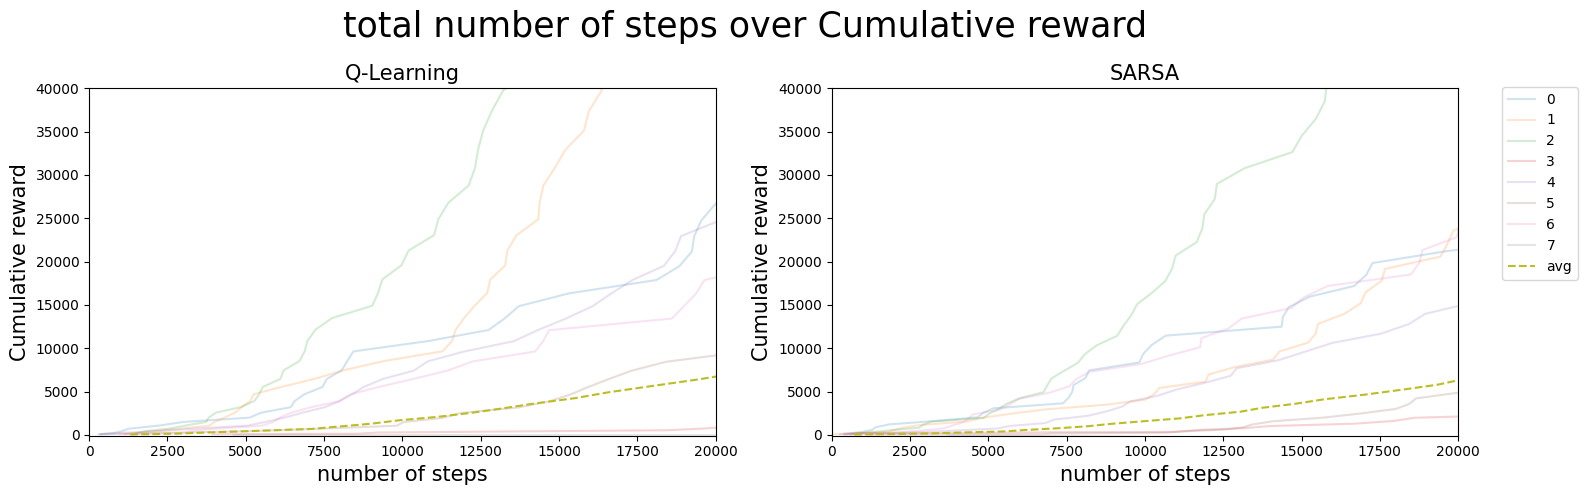

In [26]:
plot_steps([qlearning_data_A2, sarsa_data_A2], [Q_PARAMS_A2_decay_epsilon['EPISODES'], SARSA_PARAMS_A2_decay_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-100,40000, 20000])

In [27]:
print_stats(eval(qlearning_data_A2), "Q-Learning with decaying Epsilon Greedy")
print()
print_stats(eval(sarsa_data_A2), "SARSA decaying with decaying Epsilon Greedy")

Q-Learning with decaying Epsilon Greedy
Found the target for the first on average in Episode 1.0
Found the target on average 3858.875 times
Average Episode length: 652.1978317481884

SARSA decaying with decaying Epsilon Greedy
Found the target for the first on average in Episode 1.0
Found the target on average 4355.125 times
Average Episode length: 521.5110743636


In [28]:
print_parameters(Q_PARAMS_A2_decay_epsilon, SARSA_PARAMS_A2_decay_epsilon)

+--------------------+-------------------------+--------------------+
|                    |   Q-Learning Parameters |   SARSA Parameters |
|--------------------+-------------------------+--------------------|
| EPISODES           |           4416          |     4989           |
| INIT_VALUE         |              1          |        3           |
| MAX_EPISODE_LENGTH |           4614          |     3704           |
| GAMMA              |              0.998854   |        0.991291    |
| ALPHA              |              0.721596   |        0.644489    |
| EPS                |              0.293682   |        0.108993    |
| DECAY              |              0.00132676 |        0.000554062 |
+--------------------+-------------------------+--------------------+


### UCB <a class="anchor" id="2-ucb"></a>

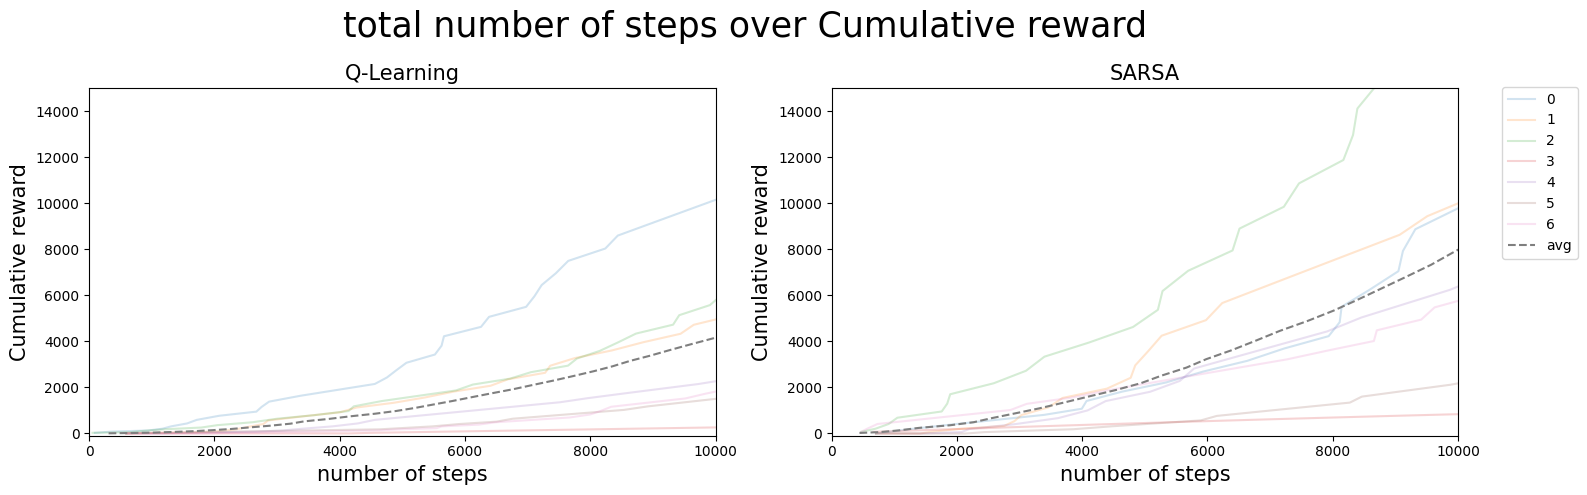

In [29]:
plot_steps([qlearning_data_ucb_A2, sarsa_data_ucb_A2], [Q_PARAMS_A2_ucb['EPISODES'], Q_PARAMS_A2_ucb['EPISODES']], ['Q-Learning', 'SARSA'], [-100,15000,10000])

In [30]:
print_stats(eval(qlearning_data_ucb_A2), "Q-Learning with UCB1")
print()
print_stats(eval(sarsa_data_ucb_A2), "SARSA decaying with UCB1")

Q-Learning with UCB1
Found the target for the first on average in Episode 2.4285714285714284
Found the target on average 2028.857142857143 times
Average Episode length: 468.96857552106167

SARSA decaying with UCB1
Found the target for the first on average in Episode 4.714285714285714
Found the target on average 1206.142857142857 times
Average Episode length: 522.2262808921038


In [31]:
print_parameters(Q_PARAMS_A2_ucb, SARSA_PARAMS_A2_UCB)

+--------------------+-------------------------+--------------------+
|                    |   Q-Learning Parameters |   SARSA Parameters |
|--------------------+-------------------------+--------------------|
| EPISODES           |             4887        |        2370        |
| INIT_VALUE         |                5        |           5        |
| MAX_EPISODE_LENGTH |              592        |         708        |
| GAMMA              |                0.999977 |           0.99946  |
| ALPHA              |                0.269506 |           0.724062 |
| EPS                |                0.842237 |           0.998259 |
+--------------------+-------------------------+--------------------+


### Epsilon Greedy <a class="anchor" id="2-epsilon"></a>

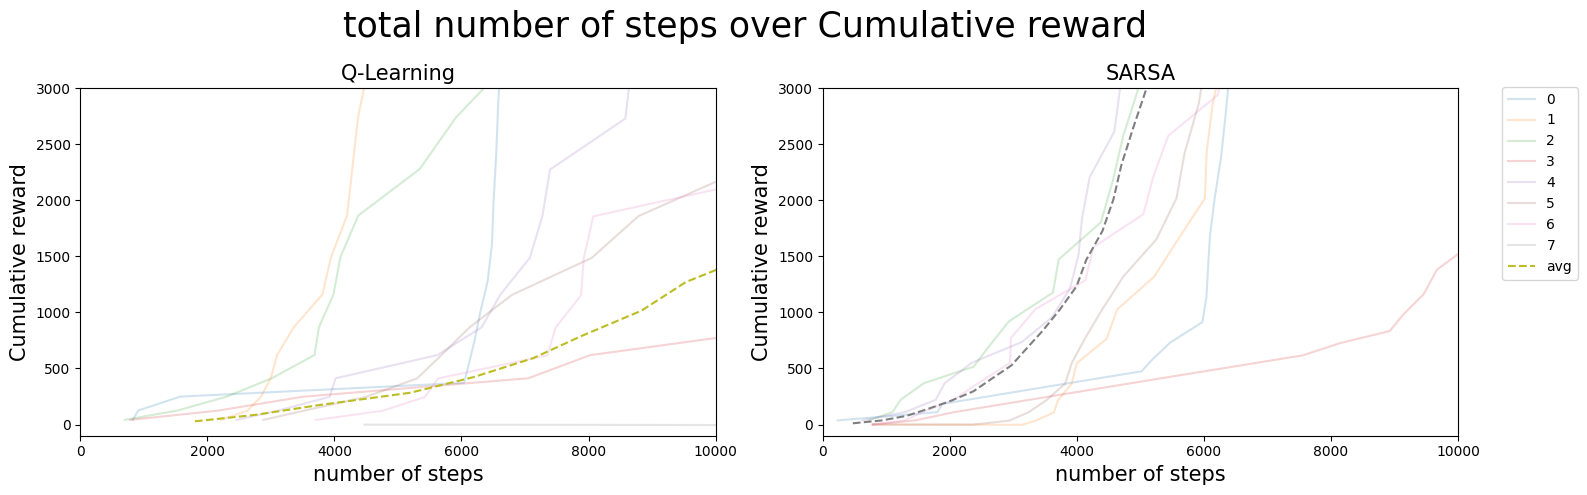

In [32]:
plot_steps([qlearning_data_no_decay_A2, sarsa_data_no_decay_A2], [Q_PARAMS_A2_epsilon['EPISODES'], SARSA_PARAMS_A2_epsilon['EPISODES']], ['Q-Learning', 'SARSA'],[-100,3000,10000])


In [33]:
print_stats(eval(qlearning_data_no_decay_A2), "Q-Learning with Epsilon Greedy")
print()
print_stats(eval(sarsa_data_no_decay_A2), "SARSA decaying with Epsilon Greedy")

Q-Learning with Epsilon Greedy
Found the target for the first on average in Episode 0.875
Found the target on average 3101.75 times
Average Episode length: 652.8678128523112

SARSA decaying with Epsilon Greedy
Found the target for the first on average in Episode 2.0
Found the target on average 4655.285714285715 times
Average Episode length: 66.10817417876241


In [34]:
print_parameters(Q_PARAMS_A2_epsilon, SARSA_PARAMS_A2_epsilon)

+--------------------+-------------------------+--------------------+
|                    |   Q-Learning Parameters |   SARSA Parameters |
|--------------------+-------------------------+--------------------|
| EPISODES           |            3548         |        4675        |
| INIT_VALUE         |               2         |           1        |
| MAX_EPISODE_LENGTH |            4471         |         785        |
| GAMMA              |               0.999656  |           0.999215 |
| ALPHA              |               0.424891  |           0.373434 |
| EPS                |               0.0694982 |           0.144905 |
+--------------------+-------------------------+--------------------+
